In [2]:
import numpy as np
import matplotlib.pyplot as plt

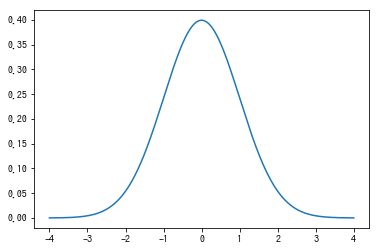

In [8]:
def KL_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

class GaussFunc:
    def __init__(self, mu: float = 0, sigma: float = 1):
        self.mu = mu
        self.sigma = sigma
        
    def gauss_func(self, x: np.ndarray) -> np.ndarray:
        return (1 / np.sqrt(2*np.pi*self.sigma)) * np.exp(-(x - self.mu)**2 / (2*self.sigma))

    
n = 1000
x = np.linspace(-4, 4, n)

std = GaussFunc(mu=0, sigma=1)
plt.plot(x, std.gauss_func(x))
plt.show()

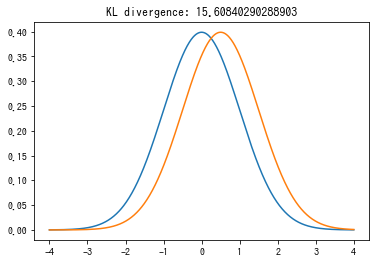

In [13]:
gauss = GaussFunc(mu=0.5, sigma=1)

kl = KL_divergence(std.gauss_func(x), gauss.gauss_func(x))

plt.figure(facecolor='white')
plt.plot(x, std.gauss_func(x))
plt.plot(x, gauss.gauss_func(x))
plt.title(f'KL divergence: {kl}')
plt.show()

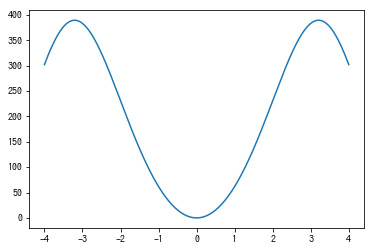

In [19]:
mu = np.linspace(-4, 4, n)

kls = []
for m in mu:
    gauss = GaussFunc(mu=m, sigma=1)
    kl = KL_divergence(gauss.gauss_func(x), std.gauss_func(x))
    kls.append(kl)

plt.figure(facecolor='white')
plt.plot(mu, kls)
plt.show()

/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


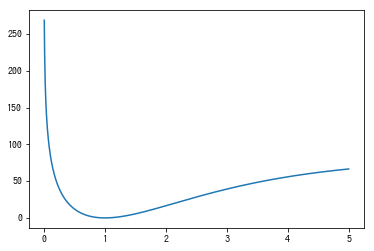

In [18]:
sigma = np.linspace(0, 5, n)

kls = []
for s in sigma:
    gauss = GaussFunc(mu=0, sigma=s)
    kl = KL_divergence(gauss.gauss_func(x), std.gauss_func(x))
    kls.append(kl)

plt.figure(facecolor='white')
plt.plot(sigma, kls)
plt.show()

/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/lee/.pyenv/versions/3.7.1/envs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


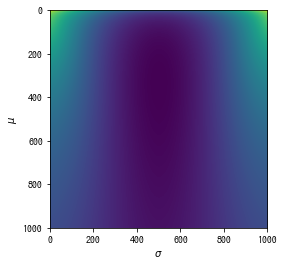

In [37]:
mu = np.linspace(-3, 3, n)
sigma = np.linspace(0, 3, n)

kl_matrix = np.zeros((n, n))
    
for i, s in enumerate(sigma):
    for j, m in enumerate(mu):
        gauss = GaussFunc(mu=m, sigma=s)
        kl = KL_divergence(gauss.gauss_func(x), std.gauss_func(x))
        kl_matrix[i, j] = kl

plt.figure(facecolor='white')
plt.imshow(kl_matrix)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.show()